#### In this preprocessing file, I will import a dataset containing 6918 user reviews. On this dataset, I am going to perform t-test and find the p value. Next I will train and test models using different algorithms and find their accuracy. The model with higher accuracy will be selected and a final model will be created.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [3]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


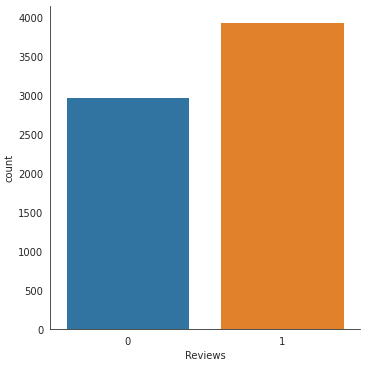

In [4]:
with sns.axes_style('white'):
    g = sns.factorplot("Reviews", data=dataset, aspect=1,
                       kind="count")
    g.set_xticklabels(step=1)

### Using the describe() function we can see the count_value, mean, standard deviation etc. Here mean is 0.569. 

In [5]:
df = dataset.loc[:,['Reviews']]
df.describe()

,Reviews
count,6918.000000
mean,0.569962
std,0.495117
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#### Here I am using a library function named 'spicy' to perform a  t-test on the dataset. Since there is only one numerical column, so One-sample t-test is used to check if there is a major difference in sample mean and population mean

### Hypothesis
#### Null hypothesis: Sample mean is equal to the hypothesized or known population mean
#### Alternative hypothesis: Sample mean is not equal to the hypothesized or known population

In [6]:
# Perform one sample t-test using spicy
from scipy import stats as st
a = df['Reviews'].to_numpy()
a

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [7]:
# length of the array
len(a)

6918

In [8]:
# lets create a sample

sample_size = 1000
review_sample = np.random.choice(a,sample_size)

In [9]:
ttest,p_value=st.ttest_1samp(review_sample,0.6)

In [10]:
print(p_value)

0.00031343317861727424


In [11]:
sample_mean=np.mean(review_sample)
print(sample_mean)

0.543


In [12]:
#if p value is less than 0.05 or 5%
if p_value < 0.05:
    print("Rejecting the null hypothesis")
else:
    print("Accepting the null hypothesis")

Rejecting the null hypothesis


#### Here I am using stopwords present in nltk libraray so that the vectorizer can ignore the unnecessary words like 'a', 'and', 'any' etc.

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mintu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopset = set(stopwords.words('english'))

#### Next I am using TF-IDF vectorizer to measure and evaluates how relevant a word is to a document in a collection of documents.  Stopwords are applied to the vectorizer so that in future it can ignore the words marked as stopwords

In [15]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)
vectorizer

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii')

#### fit_transform function is in sklearn library in python. fit and transform function is one the feature extraction for text analysis.
fit(data) Learn the vocabulary of the training data
and transform(data) Converts the training data into the Document Term Matrix

In [16]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

#### train_test_split() function is used for splitting data arrays into two subsets: for training data and for testing data. Here 70% data are used for training and 30% data on which the testing will be done.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [18]:
X_train.shape

(4842, 2011)

In [19]:
X_test.shape

(2076, 2011)

In [20]:
y_train.size

4842

In [21]:
y_test.size

2076

In [22]:
scores_dict = {}

## Applying Machine Learning Algorithms

### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
scores_dict['DecisionTreeClassifier'] = accuracy_dt
accuracy_dt

98.16955684007708

In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



### KNN algorithm

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
prediction_knn=knn.predict(X_test)
accuracy_knn= accuracy_score(y_test,prediction_knn)*100
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

97.54335260115607

In [28]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       873
           1       0.97      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.97      0.97      2076
weighted avg       0.98      0.98      0.98      2076



In [29]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k
    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score*100))

The best value of k is 3 with score : 97.92870905587668


In [30]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

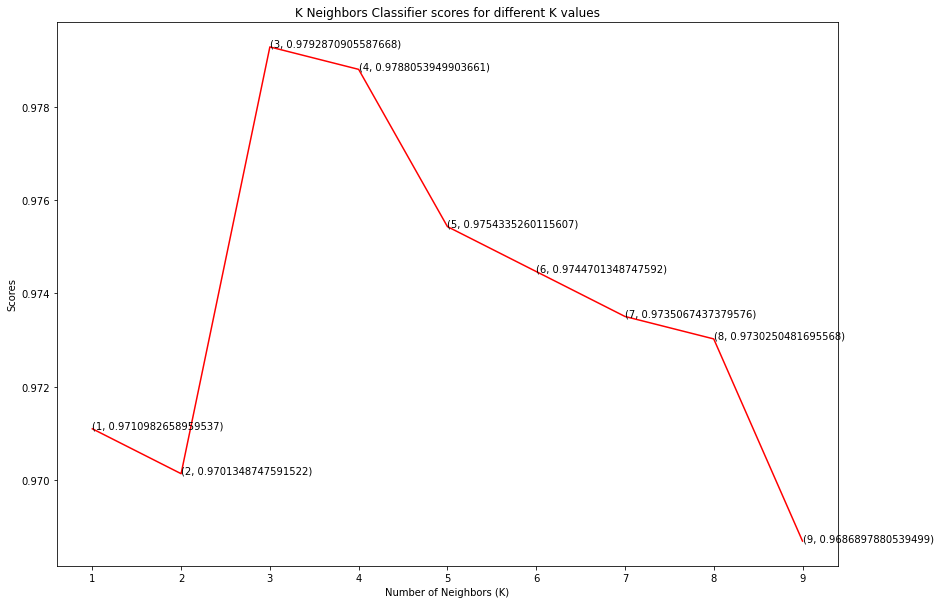

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
    
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

### Support Vector Machine

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [33]:
prediction_svm=svm.predict(X_test)
accuracy_svm= accuracy_score(y_test,prediction_svm)*100
scores_dict['SupportVectorMachine'] = accuracy_svm
accuracy_svm

98.89210019267823

In [34]:
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
prediction_rf=rf.predict(X_test)
accuracy_rf= accuracy_score(y_test,prediction_rf)*100
scores_dict['RandomForestClassifier'] = accuracy_rf
accuracy_rf

98.89210019267823

In [37]:
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



### Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
prediction_lr=lr.predict(X_test)
accuracy_lr= accuracy_score(y_test,prediction_lr)*100
scores_dict['LogisticRegression'] = accuracy_lr
accuracy_lr

98.3140655105973

In [40]:
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       873
           1       0.98      0.99      0.99      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



### Multinomial Naive Bayes Classifier

In [41]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [42]:
prediction_clf=clf.predict(X_test)
accuracy_clf= accuracy_score(y_test,prediction_clf)*100
scores_dict['naive_bayes'] = accuracy_clf
accuracy_clf

97.39884393063583

In [43]:
print(classification_report(y_test,prediction_clf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       873
           1       0.97      0.99      0.98      1203

    accuracy                           0.97      2076
   macro avg       0.97      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



In [44]:
#Accuracy Of Alogrithms
print('DecisionTree Accuracy :',accuracy_dt)
print('KNN Algorithm Accuracy :',accuracy_knn)
print('SVM Accuracy :',accuracy_svm)
print('RandomForest Accuracy :',accuracy_rf)
print('LogisticRegression Accuracy :',accuracy_lr)
print('MultinomialNB Accuracy :',accuracy_clf)

DecisionTree Accuracy : 98.16955684007708
KNN Algorithm Accuracy : 97.54335260115607
SVM Accuracy : 98.89210019267823
RandomForest Accuracy : 98.89210019267823
LogisticRegression Accuracy : 98.3140655105973
MultinomialNB Accuracy : 97.39884393063583


In [45]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test,prediction)
cm_knn = confusion_matrix(y_test,prediction_knn)
cm_svm = confusion_matrix(y_test,prediction_svm)
cm_rf = confusion_matrix(y_test,prediction_rf)
cm_lr = confusion_matrix(y_test,prediction_lr)
cm_clf = confusion_matrix(y_test,prediction_clf)

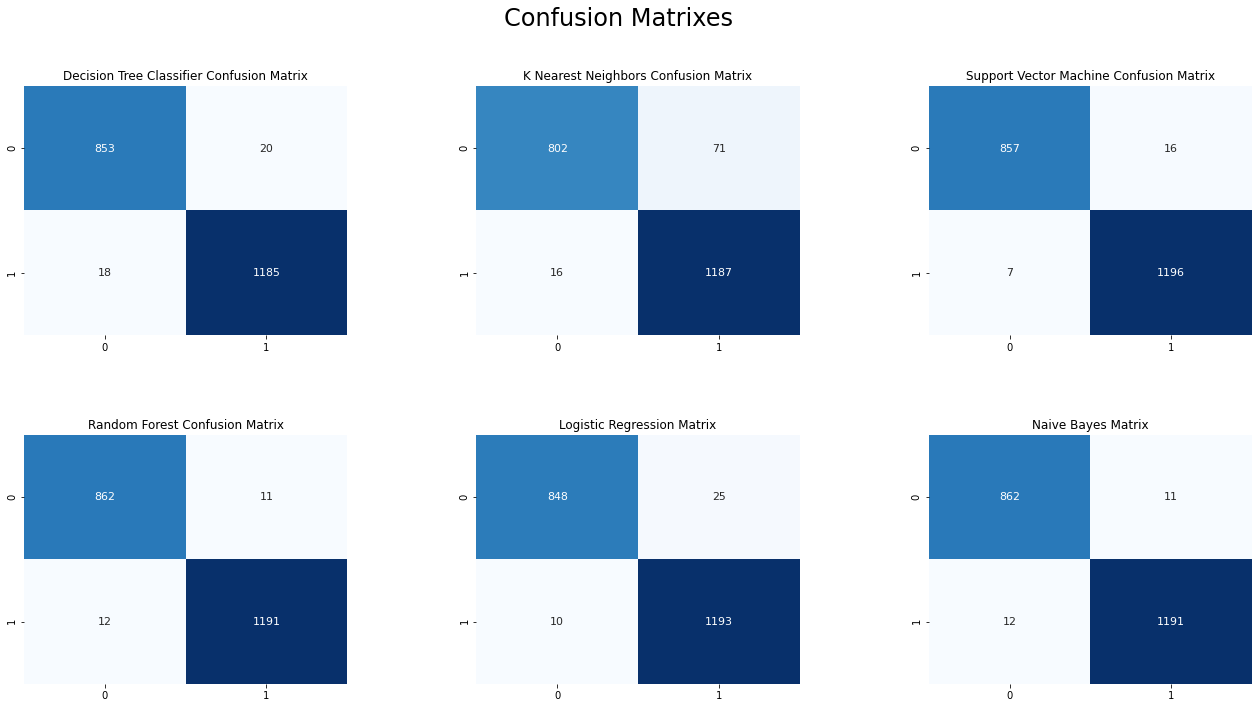

In [46]:
plt.figure(figsize=(22,11))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,5)
plt.title("Logistic Regression Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.subplot(2,3,6)
plt.title("Naive Bayes Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 11})

plt.show()

<AxesSubplot:xlabel='Accuracy score', ylabel='Algorithms'>

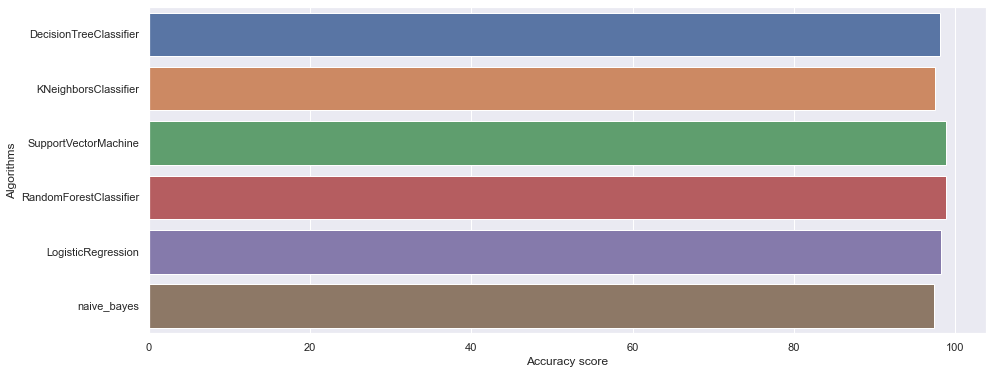

In [47]:
 algo_name = list(scores_dict.keys())
 scoress = list(scores_dict.values())

 sns.set(rc={'figure.figsize':(15,6)})
 plt.xlabel("Accuracy score")
 plt.ylabel("Algorithms")

 sns.barplot(scoress,algo_name)

### Building the final model 

In [48]:
filename = 'svm_model.pkl'
pickle.dump(svm, open(filename, 'wb'))